#**Titanic Data Preprocessing:**

###**Import dataset from kaggle:**

In [ ]:
import os
from google.colab import files
def prepare_and_load_dataset():
  # Set kaggle config directory to content
  os.environ['KAGGLE_CONFIG_DIR'] = '/content'

  #Upload kaggle.json in the colab session first.
  if not os.path.isfile('kaggle.json'):
    print("Upload kaggle.json file now...")
    uploaded = files.upload()

  #Change permissions of kaggle.json
  ! chmod 600 kaggle.json
  !kaggle competitions download -c titanic
  # This is the API Command found on the particular dataset's page on kaggle.
  print("Dataset downloaded Successfully...")

  # Rename the zip file
  # os.rename("speech-accent-archive.zip", "accent_dataset.zip")
  # print("File renamed sucessfully")

  # Extract the data in folder
  # from zipfile import ZipFile
  # filename = "accent_dataset.zip"

  # with ZipFile(filename, 'r') as zip:
  #   zip.extractall()
  #   print("Extracting the dataset... Done")

  # Remove the zip file to save space.
  # file_to_remove = "accent_dataset.zip"
  # if os.path.exists(file_to_remove):
  #   os.remove(file_to_remove)
  #   print("The zip file is removed successfully")
  # else:
  #   print("The zip file does not exist")

In [ ]:
prepare_and_load_dataset()

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
Dataset downloaded Successfully...


###**Dataset:**
Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read in Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###**Clean continuous variables:**

#### Fill missing for `Age`

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch` (Siblings and spouses) (Parents and Children)

<Figure size 432x288 with 0 Axes>

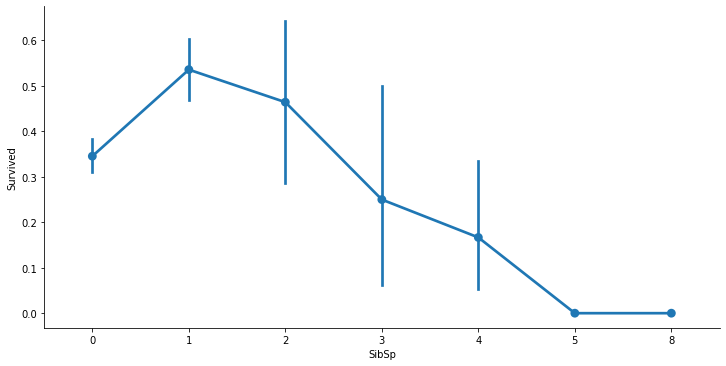

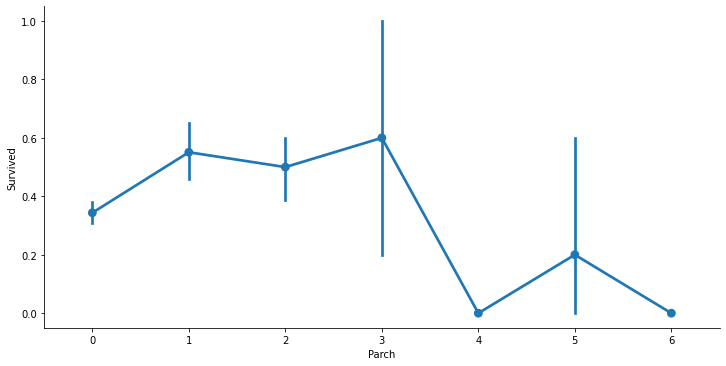

In [ ]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [ ]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [ ]:
titanic.drop(axis=1, columns=['SibSp', 'Parch', 'PassengerId'], inplace=True)

#### Drop unnnecessary variables

In [ ]:
# titanic.drop()

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [ ]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [ ]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [ ]:
titanic['cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#### Convert `Sex` to numeric

In [ ]:
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


#### Drop unnecessary variables

In [ ]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

### Write out cleaned data

In [ ]:
titanic.to_csv('titanic_cleaned.csv', index=False)

##**Split in train test and validation:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [ ]:
X = titanic.drop(columns=['Survived'], axis=1)
y = titanic['Survived']
print(X.shape)
print(y.shape)

(891, 6)
(891,)


In [ ]:
# Create Train and test split.
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.4, random_state=42)  # 40% for test and validation
Xval, Xts, yval, yts = train_test_split(Xts, yts, test_size=0.5)

In [ ]:
for dataset in [ytr, yval, yts]:
  print(round(len(dataset) / len(y), 2))
print('Xtr',Xtr.shape)
print('Xts', Xts.shape)
print('Xval', Xval.shape)
print('ytr', ytr.shape)
print('yts',yts.shape)
print('yval', yval.shape)

0.6
0.2
0.2
Xtr (534, 6)
Xts (179, 6)
Xval (178, 6)
ytr (534,)
yts (179,)
yval (178,)


####**Write the train, test, validation data to files:**

In [ ]:
Xtr.to_csv('Xtr.csv', index=False)
Xval.to_csv('Xval.csv', index=False)
Xts.to_csv('Xts.csv', index=False)

ytr.to_csv('ytr.csv', index=False)
yval.to_csv('yval.csv', index=False)
yts.to_csv('yts.csv', index=False)